Shape: (569, 31)
Columns: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
Target classes: [0 1]
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00  

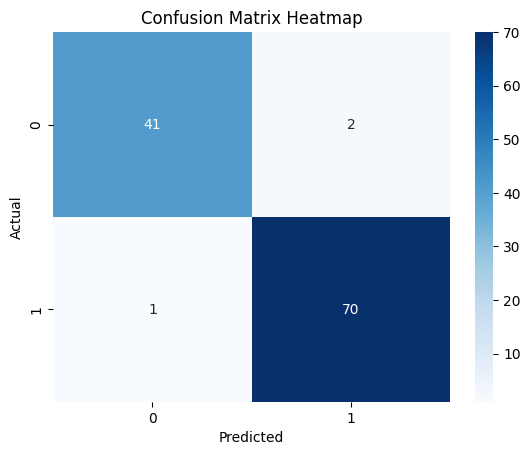

In [4]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Shape:", df.shape)
print("Columns:", df.columns)
print("Target classes:", df['target'].unique())
print(df.head())

# 2. Preprocessing
X = df.drop('target', axis=1)
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Try different train/test splits
split_ratios = [0.5, 0.6, 0.7, 0.8]
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)  # needed for log_loss
}

for ratio in split_ratios:
    print(f"\n--- Training with {int(ratio*100)}% training data ---")
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1-ratio, random_state=42)

    for name, model in models.items():
        print(f"\nModel: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:\n", cm)

        # Cross Entropy (Log Loss)
        logloss = log_loss(y_test, y_prob)
        print("Cross-Entropy Loss (Log Loss):", logloss)

        # Classification Report
        print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. 10-Fold Cross Validation
print("\n\n--- 10-Fold Cross Validation ---")
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    print(f"{name} Average Accuracy: {scores.mean():.4f}")

# 5. Confusion Matrix Heatmap (from last model)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()